In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# sublist=['ec105', 'ec106', 'ec107', 'ec108']
sublist=['ec108']
phase='recog'
all=pd.DataFrame()
for sub in sublist:
    file='data/' + sub + phase + 'eyebehave.csv'
    print(file)
    eye=pd.read_csv(file, index_col=0)
    all=pd.concat([all,eye])
all.columns

data/ec108recogeyebehave.csv


Index(['block', 'cond', 'duration', 'end', 'endloc', 'event', 'loc1end',
       'loc1start', 'loc1x', 'loc1y', 'loc2end', 'loc2start', 'loc2x', 'loc2y',
       'loc3end', 'loc3start', 'loc3x', 'loc3y', 'objonset', 'recog loc',
       'recog order', 'refresh order', 'same/diff', 'start', 'startloc',
       'study order', 'sub', 'trialend', 'trialnum', 'xend', 'xstart', 'yend',
       'ystart'],
      dtype='object')

In [ ]:
import matplotlib.image as mpimg
img=mpimg.imread('your_image.png')
imgplot = plt.imshow(img)
plt.show()

1702    1.0
1703    1.0
1704    1.0
1705    1.0
1706    1.0
1707    1.0
1708    1.0
1709    1.0
1710    1.0
1711    1.0
1712    1.0
1713    1.0
1714    1.0
1715    1.0
1716    1.0
1717    1.0
1718    1.0
1719    1.0
1720    1.0
1721    1.0
1722    1.0
1723    1.0
1724    1.0
1725    1.0
1726    1.0
1727    1.0
1728    1.0
1729    1.0
Name: cond, dtype: float64


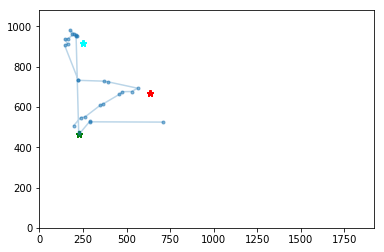

In [12]:
sub='ec108'
subdf=all[(all['sub']==sub) & (all['refresh order']==74) ]
print(subdf['cond'])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(subdf.xstart, subdf.ystart, marker='.', alpha=0.3)
ax.plot(subdf.xstart, subdf.ystart, marker='.', alpha=0.3)
ax.scatter(subdf.loc1x, subdf.loc1y, marker='*', c='cyan')
ax.scatter(subdf.loc2x, subdf.loc2y, marker='*', c='red')
ax.scatter(subdf.loc3x, subdf.loc3y, marker='*', c='green')
plt.xlim(0, 1920)
plt.ylim(0, 1080)
plt.savefig('figs/eye_path_ec108_tr74_recog.eps', format='eps', dpi=1000)


In [14]:
all['count']=1
all=all[all['recog loc']!=-1]

In [15]:
recog_num=pd.DataFrame(all.groupby(['sub', 'block', 'trialnum', 'cond', 'recog loc',])['count'].sum())
recog_num.reset_index(inplace=True)
recog_num['count']=1

recog_num=pd.DataFrame(recog_num.groupby(['sub', 'cond', 'recog loc',])['count'].sum()/64)
recog_mean=pd.DataFrame(recog_num.to_records())

recog_mean

,sub,cond,recog loc,count
0,ec105,1.0,1.0,0.656250
1,ec105,1.0,2.0,0.250000
2,ec105,1.0,3.0,0.078125
3,ec105,2.0,1.0,0.796875
4,ec105,2.0,2.0,0.062500
5,ec105,2.0,3.0,0.140625
6,ec106,1.0,1.0,0.390625
7,ec106,1.0,2.0,0.484375
8,ec106,1.0,3.0,0.125000
9,ec106,2.0,1.0,0.625000


In [16]:
# fill in missing values
conds=[1, 2]
locs=[1, 2, 3]
for newcond in conds:
    for newloc in locs:
        x=recog_mean[(recog_mean['cond']==newcond) & (recog_mean['recog loc']==newloc)]
        only=x['sub'].unique()
        for sub in sublist:
            if sub not in only:
                recog_mean.loc[recog_mean.shape[0],'sub']=sub
                recog_mean.loc[recog_mean.shape[0]-1,'cond']=newcond
                recog_mean.loc[recog_mean.shape[0]-1,'recog loc']=newloc
                recog_mean.loc[recog_mean.shape[0]-1,'count']=0 
recog_mean

,sub,cond,recog loc,count
0,ec105,1.0,1.0,0.656250
1,ec105,1.0,2.0,0.250000
2,ec105,1.0,3.0,0.078125
3,ec105,2.0,1.0,0.796875
4,ec105,2.0,2.0,0.062500
5,ec105,2.0,3.0,0.140625
6,ec106,1.0,1.0,0.390625
7,ec106,1.0,2.0,0.484375
8,ec106,1.0,3.0,0.125000
9,ec106,2.0,1.0,0.625000


In [17]:
fix=all[all['event']=='EFIX']
fix=fix[fix['duration']>80]

sacc=all[all['event']=='ESACC']

fix.columns
fix=fix[fix['startloc']!='offscreen']
fix=fix[fix['recog loc']!=-1]
fix=fix[fix['startloc']!='screen']

In [18]:
fix_dur=pd.DataFrame(fix.groupby(['sub', 'block', 'trialnum', 'cond', 'startloc', 'recog loc', 'same/diff'])['duration'].sum())
fix_dur.reset_index(inplace=True)
fix_dur.startloc.unique()
fix_dur['recog loc'].unique()

array([1., 2., 3.])

In [19]:
fix_num=pd.DataFrame(fix.groupby(['sub', 'block', 'trialnum', 'cond', 'startloc', 'recog loc', 'same/diff'])['count'].sum())
fix_num.reset_index(inplace=True)
fix_num.head()

,sub,block,trialnum,cond,startloc,recog loc,same/diff,count
0,ec105,1,2,2.0,loc1start,1.0,1.0,4
1,ec105,1,3,2.0,loc1start,1.0,1.0,2
2,ec105,1,4,2.0,loc1start,1.0,1.0,1
3,ec105,1,5,2.0,loc1start,2.0,1.0,2
4,ec105,1,6,1.0,loc1start,1.0,2.0,1


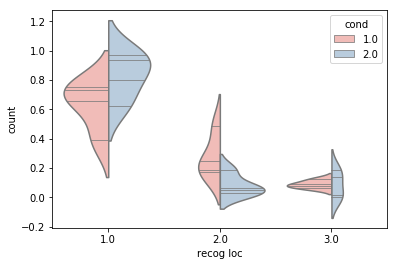

In [20]:
sns.violinplot(x="recog loc", y="count", hue='cond', split=True, inner="stick", data=recog_mean, palette="Pastel1")

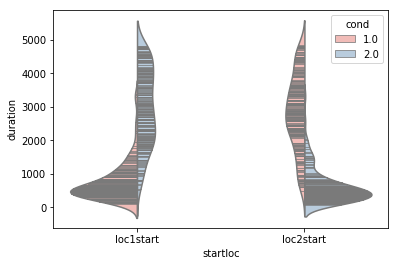

In [21]:
sns.violinplot(x="startloc", y="duration", hue='cond', split=True, inner="stick", 
               data=fix_dur[fix_dur['startloc']!='loc3start'], palette="Pastel1")

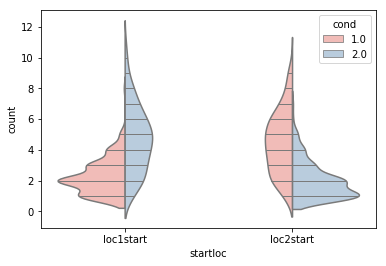

In [22]:
sns.violinplot(x="startloc", y="count", hue='cond', split=True, inner="stick", 
               data=fix_num[fix_num['startloc']!='loc3start'], palette="Pastel1")

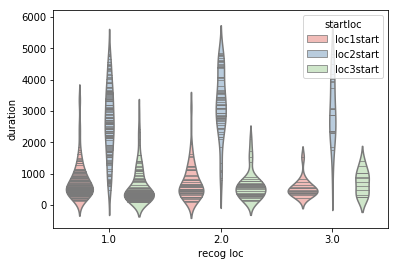

In [26]:
mismatch_fix_dur=fix_dur[fix_dur['cond']==1]
match_fix_dur=fix_dur[fix_dur['cond']==2]
sns.violinplot(x="recog loc", y="duration", hue='startloc', inner="stick", 
               data=mismatch_fix_dur, palette="Pastel1")

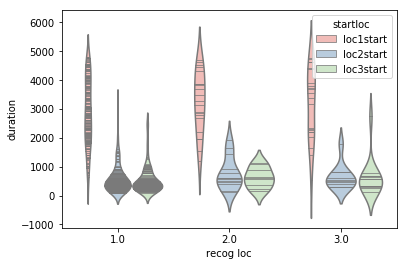

In [27]:
sns.violinplot(x="recog loc", y="duration", hue='startloc', inner="stick", 
               data=match_fix_dur, palette="Pastel1")

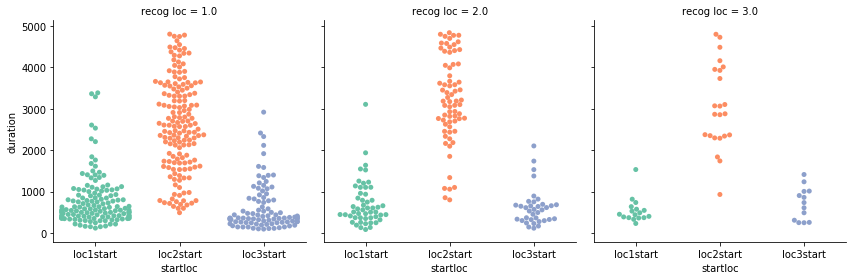

In [28]:
sns.factorplot(x="startloc", y="duration", col="recog loc", 
               data=fix_dur[fix_dur['cond']==1], kind="swarm", palette='Set2');

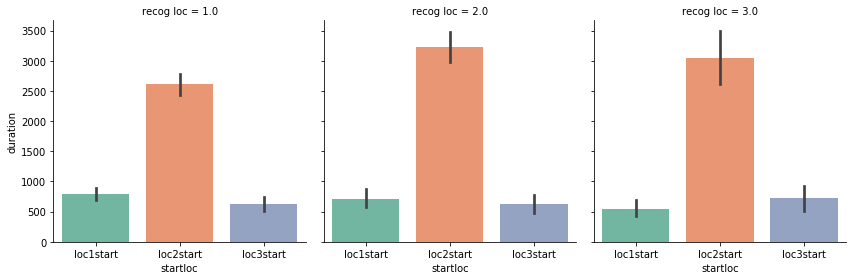

In [29]:
sns.factorplot(x="startloc", y="duration",
               col="recog loc", data=fix_dur[fix_dur['cond']==1], kind="bar", palette='Set2');

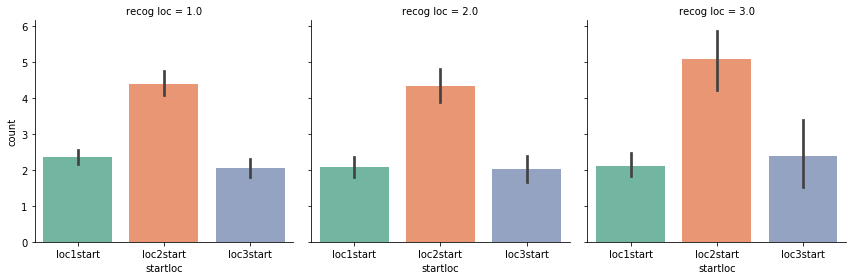

In [30]:
sns.factorplot(x="startloc", y="count",
               col="recog loc", data=fix_num[fix_num['cond']==1], kind="bar", palette='Set2');

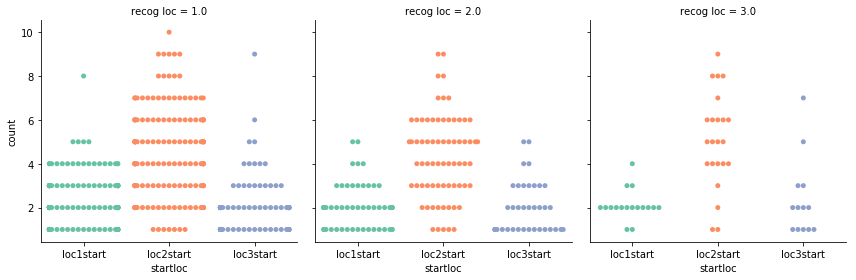

In [31]:
sns.factorplot(x="startloc", y="count",
               col="recog loc", data=fix_num[fix_num['cond']==1], kind="swarm", palette='Set2');

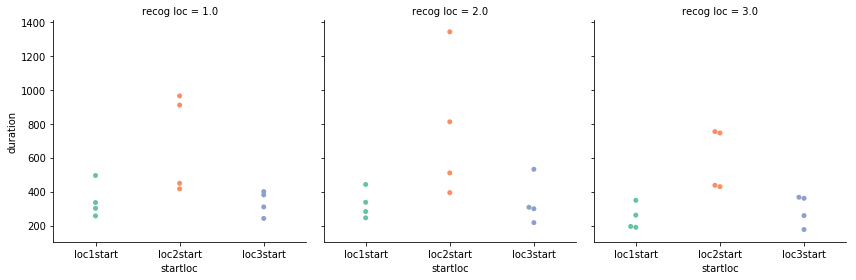

In [32]:
fix_dur_sub=pd.DataFrame(fix.groupby(['sub', 'cond', 'startloc', 'recog loc'])['duration'].mean())
fix_dur_sub.reset_index(inplace=True)
sns.factorplot(x="startloc", y="duration",
               col="recog loc", data=fix_dur_sub[fix_dur_sub['cond']==1], kind="swarm", palette='Set2');